In [99]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.neighbors import KDTree, BallTree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification, make_regression

In [100]:
X, y = load_iris(return_X_y=True)
X = X[:, [0, 2]]

In [101]:
k = 15

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

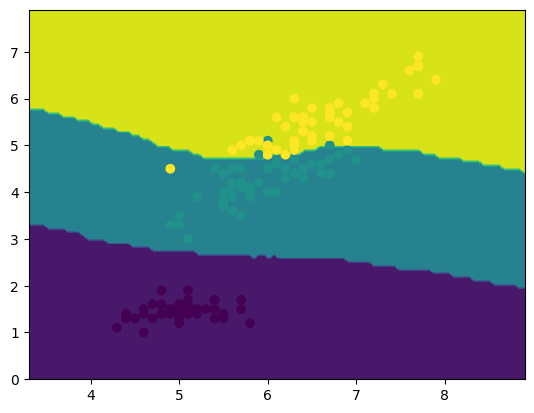

In [102]:
DecisionBoundaryDisplay.from_estimator(knn, X)
plt.scatter(*X.T, c=y)

# NCA

In [103]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

In [104]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X_train, y_train)

NeighborhoodComponentsAnalysis(random_state=42)

https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_illustration.html#sphx-glr-auto-examples-neighbors-plot-nca-illustration-py

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
print(knn.score(X_test, y_test))
knn.fit(nca.transform(X_train), y_train)
print(knn.score(nca.transform(X_test), y_test))

0.9333333333333333
0.9619047619047619


# LMNN

In [169]:
# !pip install metric_learn

In [170]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import metric_learn

In [171]:
X, y = make_classification(n_samples=100, n_classes=3, n_clusters_per_class=2,
                           n_informative=3, class_sep=4., n_features=5,
                           n_redundant=0, shuffle=True,
                           scale=[1, 1, 20, 20, 20])

In [172]:
def plot_tsne(X, y, colormap=plt.cm.Paired):
    # plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [173]:
def plot_pca(X, y, colormap=plt.cm.Paired):
    # plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    pca = PCA(n_components=2)
    X_embedded = pca.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())

    plt.show()

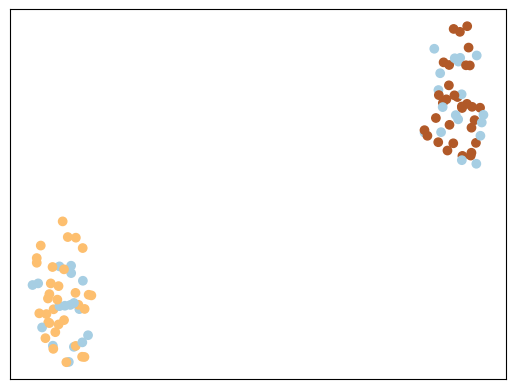

In [174]:
plot_tsne(X, y)

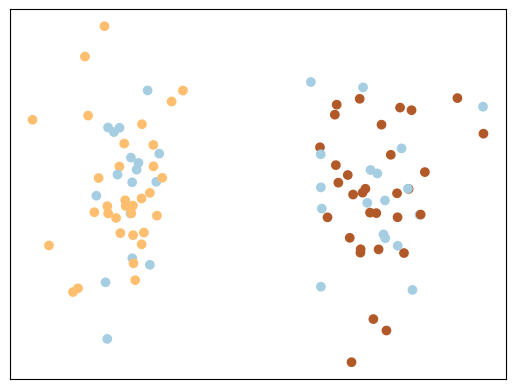

In [175]:
plot_pca(X, y)

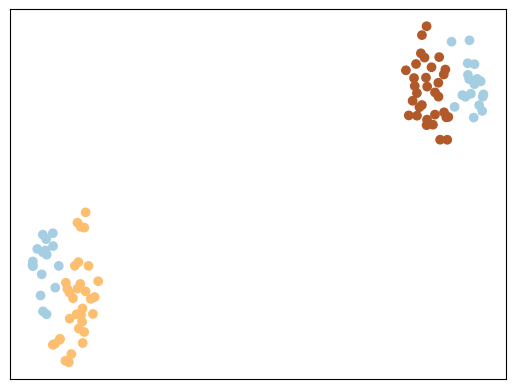

In [176]:
lmnn = metric_learn.LMNN(n_neighbors=5, learn_rate=1e-6)
lmnn.fit(X, y)
X_lmnn = lmnn.transform(X)
plot_tsne(X_lmnn, y)

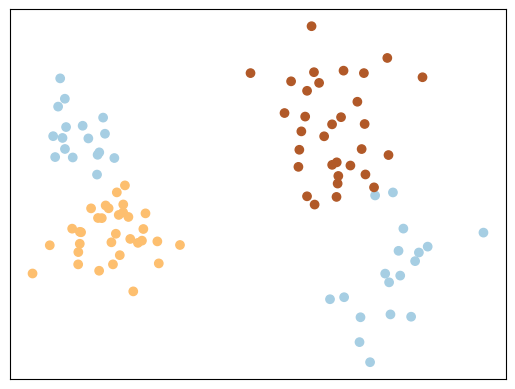

In [177]:
plot_pca(X_lmnn, y)

# Ближайшие точки

https://github.com/facebookresearch/faiss

https://github.com/nmslib/hnswlib

In [150]:
import faiss

In [151]:
d = 64                           # dimension
nb = 100000                      # database size
nq = 10000                       # nb of queries
np.random.seed(1234)             # make reproducible

In [152]:
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.

xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

In [153]:
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)

True
100000


In [154]:
k = 4                          # we want to see 4 nearest neighbors
D, I = index.search(xb[:5], k) # sanity check

In [155]:
%%time
D, I = index.search(xq, k)     # actual search
print(I[:5])                   # neighbors of the 5 first queries
print(I[-5:])                  # neighbors of the 5 last queries

[[ 381  207  210  477]
 [ 526  911  142   72]
 [ 838  527 1290  425]
 [ 196  184  164  359]
 [ 526  377  120  425]]
[[ 9900 10500  9309  9831]
 [11055 10895 10812 11321]
 [11353 11103 10164  9787]
 [10571 10664 10632  9638]
 [ 9628  9554 10036  9582]]
CPU times: user 38 s, sys: 39.2 ms, total: 38 s
Wall time: 2.84 s


In [156]:
%%time
kdtree = KDTree(xb, leaf_size=30)
dist, ind = kdtree.query(xq, k=k)
print(ind[:5])                   # neighbors of the 5 first queries
print(ind[-5:])                  # neighbors of the 5 last queries

[[ 381  207  210  477]
 [ 526  911  142   72]
 [ 838  527 1290  425]
 [ 196  184  164  359]
 [ 526  377  120  425]]
[[ 9900 10500  9309  9831]
 [11055 10895 10812 11321]
 [11353 11103 10164  9787]
 [10571 10664 10632  9638]
 [ 9628  9554 10036  9582]]
CPU times: user 3.8 s, sys: 4.05 ms, total: 3.8 s
Wall time: 3.78 s


In [157]:
%%time
balltree = BallTree(xb, leaf_size=30)
dist, ind = balltree.query(xq, k=k)
print(ind[:5])                   # neighbors of the 5 first queries
print(ind[-5:])                  # neighbors of the 5 last queries

[[ 381  207  210  477]
 [ 526  911  142   72]
 [ 838  527 1290  425]
 [ 196  184  164  359]
 [ 526  377  120  425]]
[[ 9900 10500  9309  9831]
 [11055 10895 10812 11321]
 [11353 11103 10164  9787]
 [10571 10664 10632  9638]
 [ 9628  9554 10036  9582]]
CPU times: user 3.56 s, sys: 4 ms, total: 3.56 s
Wall time: 3.56 s


Разные расстояния:

https://github.com/facebookresearch/faiss/wiki/MetricType-and-distances

# Metric learning

https://github.com/KevinMusgrave/pytorch-metric-learning/blob/master/examples/notebooks/Inference.ipynb

# RAG

https://python.langchain.com/docs/integrations/vectorstores/faiss/